<a href="https://colab.research.google.com/github/pk2971/Air-Quality-time-series/blob/main/Air_Quality_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Air Quality vs Temperature Time Series Forecasting.**


Author: Praharshita Kaithepalli(pk2971@rit.edu)


Data Set:https://archive.ics.uci.edu/ml/datasets/Air+Quality 

Pollutants/Greenhouse gasses in the air often cause a rise in the temperature at any given time of the day. 
As the day progresses and the traffic increases during a certain time of the day there might be more pollutants in the air(for example during the morning rush hours or when everyone is going back to homes or during the factorys working hours). Our goal is to see if we can predict the amount of pollutants in the air, temperature by studying the patterns across different times.


In [166]:
import pandas as pd
import io
import csv

In [167]:
#from google.colab import drive
#drive.mount('/gdrive',force_remount=True)
#%cd /gdrive

In [168]:
df=pd.read_csv("/content/AirQualityUCI.csv",sep=';',decimal='.',quoting=csv.QUOTE_NONE, skip_blank_lines=False)

In [169]:
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [170]:
df=df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [171]:
from datetime import datetime as dt
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S' ).dt.time
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [172]:
df['DateTime']=pd.to_datetime(df.Date.astype(str) + ' ' + df.Time.astype(str),errors='coerce')

In [173]:
df['CO(GT)']=df['CO(GT)'].str.replace(",",".")
df['CO(GT)']=df['CO(GT)'].astype(float)

In [174]:
df['C6H6(GT)']=df['C6H6(GT)'].str.replace(",",".")
df['C6H6(GT)']=df['C6H6(GT)'].astype(float)

In [175]:
df['T']=df['T'].str.replace(",",".")
df['T']=df['T'].astype(float)

In [176]:
df['RH']=df['RH'].str.replace(",",".")
df['RH']=df['RH'].astype(float)

In [177]:
df['AH']=df['AH'].str.replace(",",".")
df['AH']=df['AH'].astype(float)

In [178]:
df=df.dropna()

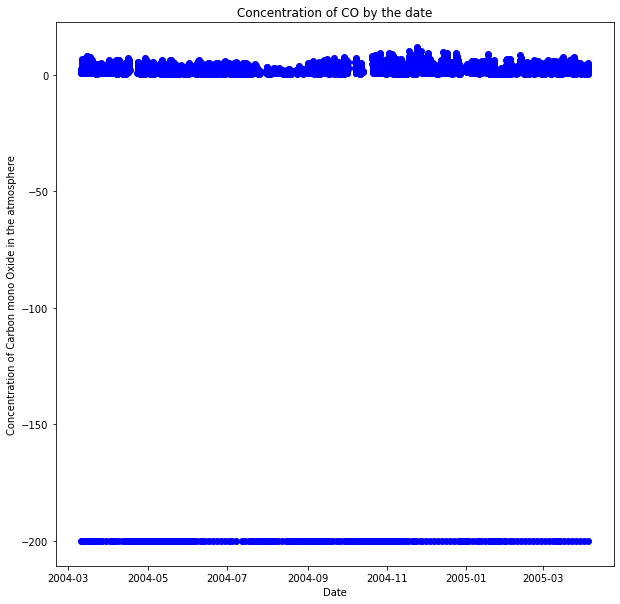

In [179]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['CO(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

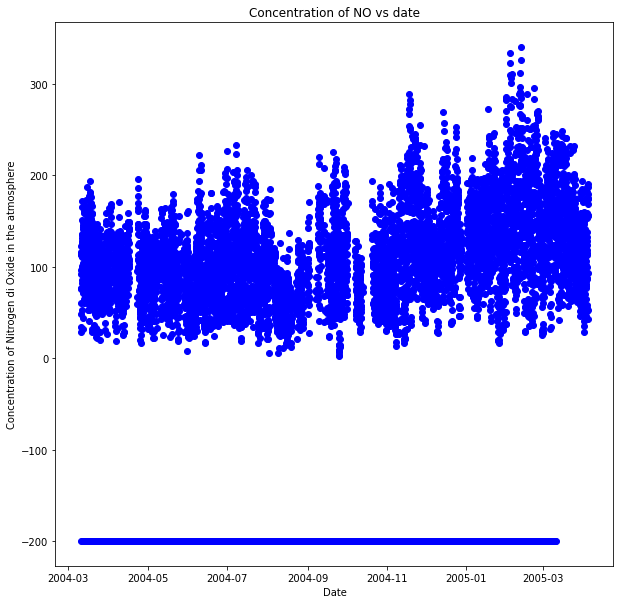

In [180]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['NO2(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Nitrogen di Oxide in the atmosphere",
       title="Concentration of NO vs date")

plt.show()

In [181]:
print((df['CO(GT)']==-200).sum())

1683


In [182]:
df=df[df['CO(GT)']!=-200]

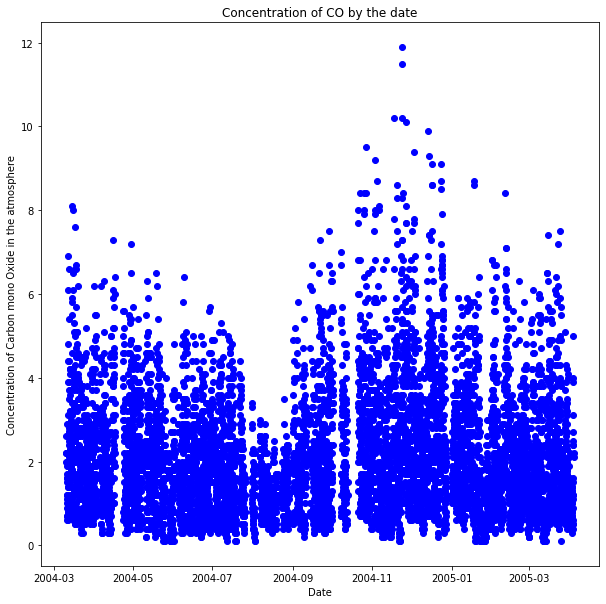

In [183]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['CO(GT)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

In [184]:
print ("PT08.S1(CO) ",(df['PT08.S1(CO)']==-200).sum())
print("NMHC(GT) ",(df['NMHC(GT)']==-200).sum())
print("C6H6(GT) ",(df['C6H6(GT)']==-200).sum())
print("PT08.S2(NMHC)",(df['PT08.S2(NMHC)']==-200).sum())
print("NO2(GT)",(df['NO2(GT)']==-200).sum())
print("PT08.S4(NO2)",(df['PT08.S4(NO2)']==-200).sum())
print("PT08.S5(O3)",(df['PT08.S5(O3)']==-200).sum())
print("T",(df['T']==-200).sum())
print("RH",(df['RH']==-200).sum())
print("AH",(df['AH']==-200).sum())

PT08.S1(CO)  330
NMHC(GT)  6784
C6H6(GT)  330
PT08.S2(NMHC) 330
NO2(GT) 416
PT08.S4(NO2) 330
PT08.S5(O3) 330
T 330
RH 330
AH 330


In [185]:
del df['NMHC(GT)']
#Too many outlier values we will drop the whole column as there is no use fixing the outlier.

In [186]:
median=df.loc[df['PT08.S1(CO)']!=-200,'PT08.S1(CO)'].median()
df.loc[df['PT08.S1(CO)']==-200,'PT08.S1(CO)']=np.nan
df['PT08.S1(CO)'].fillna(median,inplace=True)
median

1075.0

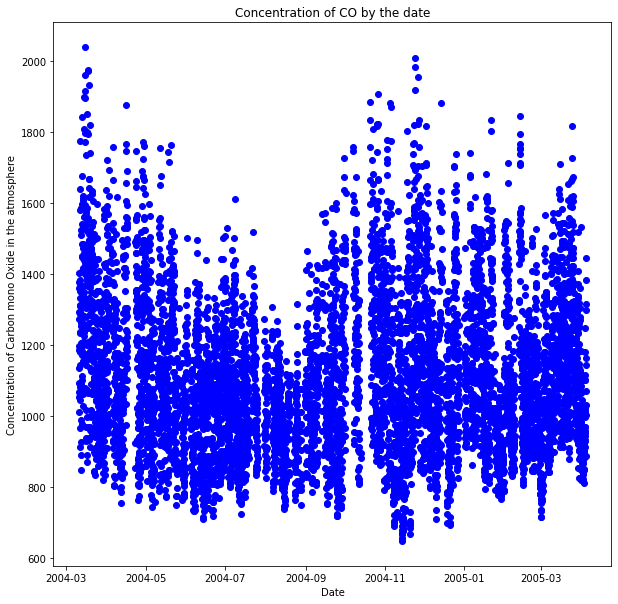

In [187]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['PT08.S1(CO)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

In [188]:
median=df.loc[df['C6H6(GT)']!=-200,'C6H6(GT)'].median()
df.loc[df['C6H6(GT)']==-200,'C6H6(GT)']=np.nan
df['C6H6(GT)'].fillna(median,inplace=True)
median

8.5

In [189]:
median=df.loc[df['PT08.S2(NMHC)']!=-200,'PT08.S2(NMHC)'].median()
df.loc[df['PT08.S2(NMHC)']==-200,'PT08.S2(NMHC)']=np.nan
df['PT08.S2(NMHC)'].fillna(median,inplace=True)
median

919.0

In [190]:
median=df.loc[df['NOx(GT)']!=-200,'NOx(GT)'].median()
df.loc[df['NOx(GT)']==-200,'NOx(GT)']=np.nan
df['NOx(GT)'].fillna(median,inplace=True)
median

188.0

In [191]:
median=df.loc[df['PT08.S3(NOx)']!=-200,'PT08.S3(NOx)'].median()
df.loc[df['PT08.S3(NOx)']==-200,'PT08.S3(NOx)']=np.nan
df['PT08.S3(NOx)'].fillna(median,inplace=True)
median

795.0

In [192]:
median=df.loc[df['NO2(GT)']!=-200,'NO2(GT)'].median()
df.loc[df['NO2(GT)']==-200,'NO2(GT)']=np.nan
df['NO2(GT)'].fillna(median,inplace=True)
median

110.0

In [193]:
median=df.loc[df['PT08.S4(NO2)']!=-200,'PT08.S4(NO2)'].median()
df.loc[df['PT08.S4(NO2)']==-200,'PT08.S4(NO2)']=np.nan
df['PT08.S4(NO2)'].fillna(median,inplace=True)
median

1447.0

In [194]:
median=df.loc[df['PT08.S5(O3)']!=-200,'PT08.S5(O3)'].median()
df.loc[df['PT08.S5(O3)']==-200,'PT08.S5(O3)']=np.nan
df['PT08.S5(O3)'].fillna(median,inplace=True)
median

990.0

In [195]:
mean=df.loc[df['T']!=-200,'T'].mean()
df.loc[df['T']==-200,'T']=np.nan
df['T'].fillna(mean,inplace=True)
mean

17.770424836601407

In [196]:
mean=df.loc[df['AH']!=-200,'AH'].mean()
df.loc[df['AH']==-200,'AH']=np.nan
df['AH'].fillna(mean,inplace=True)
mean

0.9894533088235242

In [197]:
mean=df.loc[df['RH']!=-200,'RH'].mean()
df.loc[df['RH']==-200,'RH']=np.nan
df['RH'].fillna(mean,inplace=True)
mean

49.06007625272324

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7674 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7674 non-null   datetime64[ns]
 1   Time           7674 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    7674 non-null   float64       
 4   C6H6(GT)       7674 non-null   float64       
 5   PT08.S2(NMHC)  7674 non-null   float64       
 6   NOx(GT)        7674 non-null   float64       
 7   PT08.S3(NOx)   7674 non-null   float64       
 8   NO2(GT)        7674 non-null   float64       
 9   PT08.S4(NO2)   7674 non-null   float64       
 10  PT08.S5(O3)    7674 non-null   float64       
 11  T              7674 non-null   float64       
 12  RH             7674 non-null   float64       
 13  AH             7674 non-null   float64       
 14  DateTime       7674 non-null   datetime64[ns]
dtypes: datetime64[ns](2),

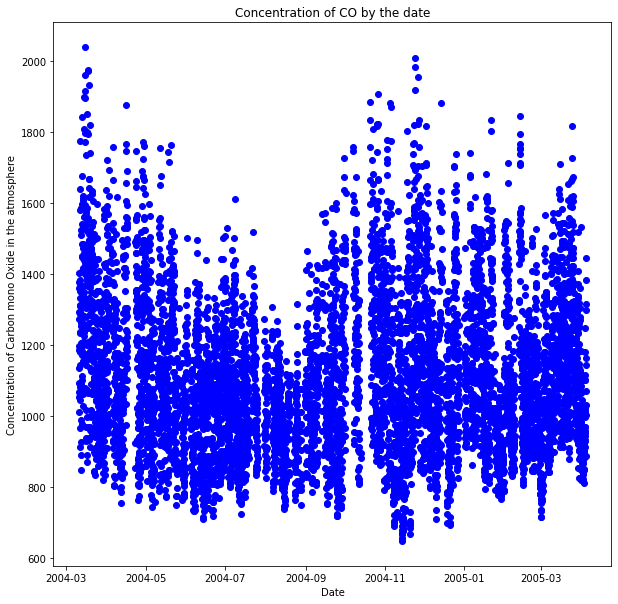

In [199]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['DateTime'],df['PT08.S1(CO)'],color='blue')
ax.set(xlabel="Date",
       ylabel="Concentration of Carbon mono Oxide in the atmosphere",
       title="Concentration of CO by the date")

plt.show()

In [200]:
df=df.dropna()

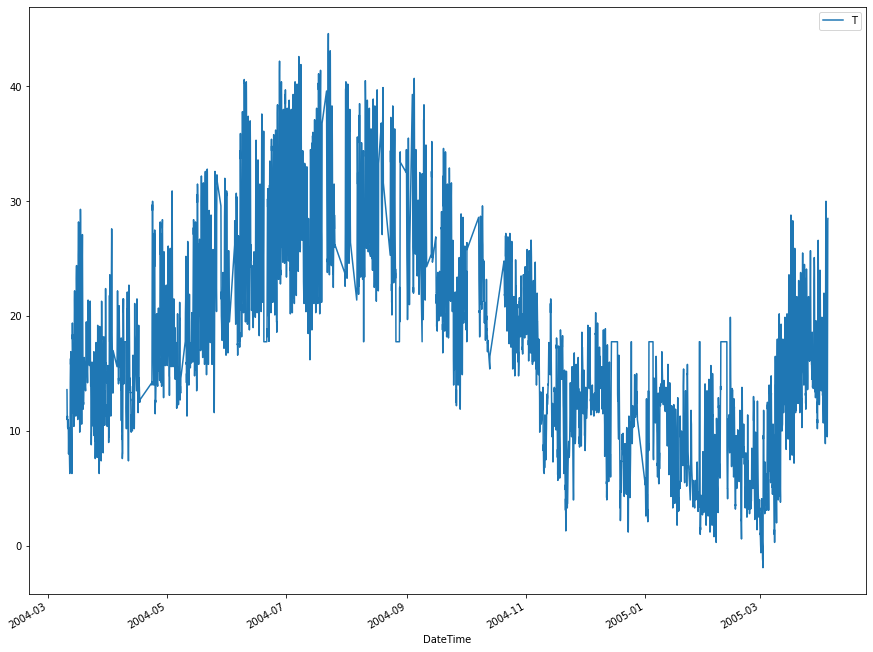

In [201]:
df.plot(x='DateTime',y='T',figsize=(15,12))

In [202]:
cols=list(df)[2:14]

In [203]:
df_for_training=df[cols]

In [204]:
df.index=df.pop('DateTime')

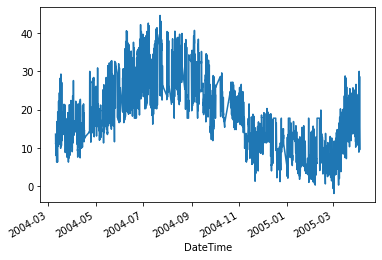

In [205]:
temp=df['T']
temp.plot()

In [206]:
temp.head(15)

DateTime
2004-03-10 18:00:00    13.6
2004-03-10 19:00:00    13.3
2004-03-10 20:00:00    11.9
2004-03-10 21:00:00    11.0
2004-03-10 22:00:00    11.2
2004-03-10 23:00:00    11.2
2004-03-11 00:00:00    11.3
2004-03-11 01:00:00    10.7
2004-03-11 02:00:00    10.7
2004-03-11 03:00:00    10.3
2004-03-11 05:00:00    11.0
2004-03-11 06:00:00    10.5
2004-03-11 07:00:00    10.2
2004-03-11 08:00:00    10.8
2004-03-11 09:00:00    10.5
Name: T, dtype: float64

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7674 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7674 non-null   datetime64[ns]
 1   Time           7674 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    7674 non-null   float64       
 4   C6H6(GT)       7674 non-null   float64       
 5   PT08.S2(NMHC)  7674 non-null   float64       
 6   NOx(GT)        7674 non-null   float64       
 7   PT08.S3(NOx)   7674 non-null   float64       
 8   NO2(GT)        7674 non-null   float64       
 9   PT08.S4(NO2)   7674 non-null   float64       
 10  PT08.S5(O3)    7674 non-null   float64       
 11  T              7674 non-null   float64       
 12  RH             7674 non-null   float64       
 13  AH             7674 non-null   float64       
dtypes: datetime64[ns](1), float64(12), o

In [208]:
def df_to_X_y(df,window_size=5):
  df_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_np)-window_size):
    row = [[a] for a in df_np[i:i+window_size]]
    X.append(row)
    label = df_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)


In [209]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((7669, 5, 1), (7669,))

In [210]:
X_train1, y_train1 = X1[:5000], y1[:5000]
X_val1, y_val1 = X1[5000:5500], y1[5000:5500]
X_test1, y_test1 = X1[5500:], y1[5500:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((5000, 5, 1), (5000,), (500, 5, 1), (500,), (2169, 5, 1), (2169,))

In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [212]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [213]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15, callbacks=[cp1])

Epoch 1/15
149/157 [===========================>..] - ETA: 0s - loss: 484.2247 - root_mean_squared_error: 22.0051

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 8s 39ms/step - loss: 481.4326 - root_mean_squared_error: 21.9416 - val_loss: 121.1734 - val_root_mean_squared_error: 11.0079
Epoch 2/15
151/157 [===========================>..] - ETA: 0s - loss: 381.4507 - root_mean_squared_error: 19.5308

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 32ms/step - loss: 378.4713 - root_mean_squared_error: 19.4543 - val_loss: 41.9214 - val_root_mean_squared_error: 6.4747
Epoch 3/15
157/157 [==============================] - ETA: 0s - loss: 209.9039 - root_mean_squared_error: 14.4881

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 6s 36ms/step - loss: 209.9039 - root_mean_squared_error: 14.4881 - val_loss: 20.0663 - val_root_mean_squared_error: 4.4795
Epoch 4/15
157/157 [==============================] - 1s 5ms/step - loss: 104.2084 - root_mean_squared_error: 10.2083 - val_loss: 28.9103 - val_root_mean_squared_error: 5.3768
Epoch 5/15
146/157 [==========================>...] - ETA: 0s - loss: 55.5209 - root_mean_squared_error: 7.4512

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 32ms/step - loss: 54.6312 - root_mean_squared_error: 7.3913 - val_loss: 8.0462 - val_root_mean_squared_error: 2.8366
Epoch 6/15
151/157 [===========================>..] - ETA: 0s - loss: 32.9689 - root_mean_squared_error: 5.7419

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 6s 36ms/step - loss: 32.7711 - root_mean_squared_error: 5.7246 - val_loss: 3.3621 - val_root_mean_squared_error: 1.8336
Epoch 7/15
156/157 [============================>.] - ETA: 0s - loss: 22.1135 - root_mean_squared_error: 4.7025

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 33ms/step - loss: 22.1062 - root_mean_squared_error: 4.7017 - val_loss: 2.3136 - val_root_mean_squared_error: 1.5210
Epoch 8/15
152/157 [============================>.] - ETA: 0s - loss: 16.4446 - root_mean_squared_error: 4.0552

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 33ms/step - loss: 16.2225 - root_mean_squared_error: 4.0277 - val_loss: 1.8002 - val_root_mean_squared_error: 1.3417
Epoch 9/15
154/157 [============================>.] - ETA: 0s - loss: 12.3975 - root_mean_squared_error: 3.5210

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 6s 37ms/step - loss: 12.4162 - root_mean_squared_error: 3.5237 - val_loss: 1.6769 - val_root_mean_squared_error: 1.2949
Epoch 10/15
152/157 [============================>.] - ETA: 0s - loss: 9.6832 - root_mean_squared_error: 3.1118

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 33ms/step - loss: 9.6653 - root_mean_squared_error: 3.1089 - val_loss: 1.5134 - val_root_mean_squared_error: 1.2302
Epoch 11/15
148/157 [===========================>..] - ETA: 0s - loss: 7.6220 - root_mean_squared_error: 2.7608

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 32ms/step - loss: 7.6441 - root_mean_squared_error: 2.7648 - val_loss: 1.2459 - val_root_mean_squared_error: 1.1162
Epoch 12/15
155/157 [============================>.] - ETA: 0s - loss: 6.2240 - root_mean_squared_error: 2.4948

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 6s 38ms/step - loss: 6.2109 - root_mean_squared_error: 2.4922 - val_loss: 1.2419 - val_root_mean_squared_error: 1.1144
Epoch 13/15
156/157 [============================>.] - ETA: 0s - loss: 5.2097 - root_mean_squared_error: 2.2825

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 5s 33ms/step - loss: 5.2056 - root_mean_squared_error: 2.2816 - val_loss: 1.2386 - val_root_mean_squared_error: 1.1129
Epoch 14/15
147/157 [===========================>..] - ETA: 0s - loss: 4.5352 - root_mean_squared_error: 2.1296

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


157/157 [==============================] - 6s 37ms/step - loss: 4.4952 - root_mean_squared_error: 2.1202 - val_loss: 1.1430 - val_root_mean_squared_error: 1.0691
Epoch 15/15
157/157 [==============================] - 1s 5ms/step - loss: 3.9770 - root_mean_squared_error: 1.9942 - val_loss: 1.2025 - val_root_mean_squared_error: 1.0966


In [214]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [215]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,11.137813,11.2
1,11.375773,11.3
2,11.496730,10.7
3,10.800928,10.7
4,10.757773,10.3
...,...,...
4995,12.402868,12.5
4996,12.750615,12.6
4997,12.807728,12.5
4998,12.623670,13.1


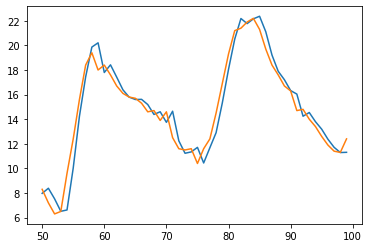

In [216]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [217]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,13.430516,13.3
1,13.451804,13.3
2,13.396455,12.7
3,12.668402,11.9
4,11.752381,11.8
...,...,...
495,11.940904,12.0
496,12.179926,11.2
497,11.255872,11.5
498,11.537560,11.6


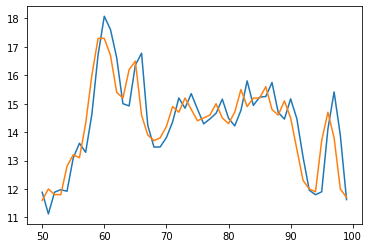

In [218]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [219]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,11.677292,11.7
1,11.855103,11.9
2,12.109857,12.5
3,12.791009,12.3
4,12.509748,11.5
...,...,...
2164,20.234707,21.9
2165,23.626492,24.3
2166,25.193981,26.9
2167,27.172440,28.3


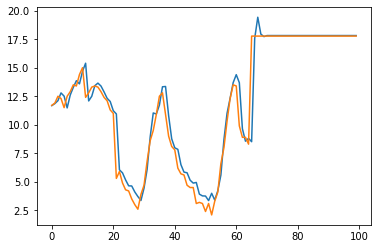

In [220]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][0:100])
plt.plot(test_results['Actuals'][0:100])

In [221]:
mse(y_test1, test_predictions)

1.7025917408618307

Model 2: Convolutional Neural Networks

In [222]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 8)                 2056      
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [223]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [224]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15, callbacks=[cp2])

Epoch 1/15
140/157 [=========================>....] - ETA: 0s - loss: 188.0691 - root_mean_squared_error: 13.7138INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 2s 7ms/step - loss: 171.0391 - root_mean_squared_error: 13.0782 - val_loss: 6.4877 - val_root_mean_squared_error: 2.5471
Epoch 2/15
139/157 [=========================>....] - ETA: 0s - loss: 12.0950 - root_mean_squared_error: 3.4778INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 11.8104 - root_mean_squared_error: 3.4366 - val_loss: 3.9174 - val_root_mean_squared_error: 1.9792
Epoch 3/15
143/157 [==========================>...] - ETA: 0s - loss: 10.2150 - root_mean_squared_error: 3.1961INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 10.1493 - root_mean_squared_error: 3.1858 - val_loss: 3.7337 - val_root_mean_squared_error: 1.9323
Epoch 4/15
144/157 [==========================>...] - ETA: 0s - loss: 9.6695 - root_mean_squared_error: 3.1096INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 9.6150 - root_mean_squared_error: 3.1008 - val_loss: 3.5383 - val_root_mean_squared_error: 1.8810
Epoch 5/15
139/157 [=========================>....] - ETA: 0s - loss: 9.1250 - root_mean_squared_error: 3.0208INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 9.0364 - root_mean_squared_error: 3.0061 - val_loss: 3.3324 - val_root_mean_squared_error: 1.8255
Epoch 6/15
153/157 [============================>.] - ETA: 0s - loss: 8.4641 - root_mean_squared_error: 2.9093INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 8.4411 - root_mean_squared_error: 2.9053 - val_loss: 3.1193 - val_root_mean_squared_error: 1.7661
Epoch 7/15
144/157 [==========================>...] - ETA: 0s - loss: 7.8669 - root_mean_squared_error: 2.8048INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 10ms/step - loss: 7.8198 - root_mean_squared_error: 2.7964 - val_loss: 2.9179 - val_root_mean_squared_error: 1.7082
Epoch 8/15
139/157 [=========================>....] - ETA: 0s - loss: 7.3103 - root_mean_squared_error: 2.7038INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 7.2285 - root_mean_squared_error: 2.6886 - val_loss: 2.7037 - val_root_mean_squared_error: 1.6443
Epoch 9/15
146/157 [==========================>...] - ETA: 0s - loss: 6.6665 - root_mean_squared_error: 2.5820INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 7ms/step - loss: 6.6462 - root_mean_squared_error: 2.5780 - val_loss: 2.4966 - val_root_mean_squared_error: 1.5801
Epoch 10/15
138/157 [=========================>....] - ETA: 0s - loss: 6.0618 - root_mean_squared_error: 2.4621INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 6.0910 - root_mean_squared_error: 2.4680 - val_loss: 2.3243 - val_root_mean_squared_error: 1.5246
Epoch 11/15
143/157 [==========================>...] - ETA: 0s - loss: 5.5428 - root_mean_squared_error: 2.3543INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 5.5790 - root_mean_squared_error: 2.3620 - val_loss: 2.1443 - val_root_mean_squared_error: 1.4643
Epoch 12/15
147/157 [===========================>..] - ETA: 0s - loss: 5.1442 - root_mean_squared_error: 2.2681INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 5.1110 - root_mean_squared_error: 2.2608 - val_loss: 2.0195 - val_root_mean_squared_error: 1.4211
Epoch 13/15
136/157 [========================>.....] - ETA: 0s - loss: 4.7194 - root_mean_squared_error: 2.1724INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 4.6956 - root_mean_squared_error: 2.1669 - val_loss: 1.8522 - val_root_mean_squared_error: 1.3610
Epoch 14/15
143/157 [==========================>...] - ETA: 0s - loss: 4.2115 - root_mean_squared_error: 2.0522INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 4.1992 - root_mean_squared_error: 2.0492 - val_loss: 1.6491 - val_root_mean_squared_error: 1.2842
Epoch 15/15
146/157 [==========================>...] - ETA: 0s - loss: 3.7728 - root_mean_squared_error: 1.9424INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


157/157 [==============================] - 1s 6ms/step - loss: 3.7154 - root_mean_squared_error: 1.9275 - val_loss: 1.5369 - val_root_mean_squared_error: 1.2397


In [225]:
from tensorflow.keras.models import load_model
model1 = load_model('model2/')

In [226]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,11.016967,11.2
1,11.039858,11.3
2,11.194969,10.7
3,11.079648,10.7
4,10.734691,10.3
...,...,...
4995,12.137016,12.5
4996,12.414834,12.6
4997,12.818698,12.5
4998,12.642380,13.1


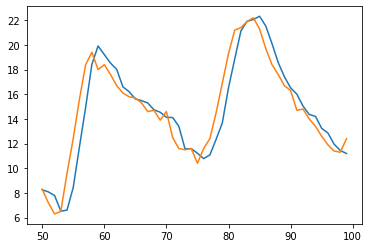

In [227]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [228]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,13.309842,13.3
1,13.315428,13.3
2,13.473809,12.7
3,12.992927,11.9
4,12.200850,11.8
...,...,...
495,11.654434,12.0
496,11.895340,11.2
497,11.630983,11.5
498,11.380875,11.6


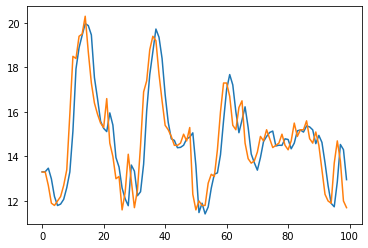

In [229]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][0:100])
plt.plot(val_results['Actuals'][0:100])

In [230]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,11.495353,11.7
1,11.762669,11.9
2,11.955604,12.5
3,12.365811,12.3
4,12.567081,11.5
...,...,...
2164,16.800724,21.9
2165,21.167755,24.3
2166,24.533371,26.9
2167,26.960358,28.3


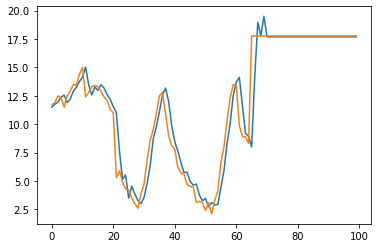

In [231]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][0:100])
plt.plot(test_results['Actuals'][0:100])

In [232]:
mse(y_test1, test_predictions)

2.3311273063478963